In [1]:

#g Set Matplotlib to plot inline. 
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
#g
import matplotlib.pyplot as plt
#m
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#n
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

#q
from sklearn.metrics import classification_report


#s
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import roc_curve, auc, roc_auc_score

<b> A.) Load the dataset in Jupyter Notebook.

In [2]:
patients_data = pd.read_csv('./patients.csv')

<b> B.) Using head(), examine the data.

In [3]:
patients_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<b> C.) Provide mean, median, standard deviation, and quartiles for each independent variable. Explain your results.

In [4]:
statistics = patients_data.drop('Diagnosis', axis=1).describe(include='all')
q1 = patients_data.quantile(0.25)
q2 = patients_data.quantile(0.5)
q3 = patients_data.quantile(0.75)
q4 = patients_data.quantile(1)

# add quartiles to the statistics DataFrame
statistics.loc['25%'] = q1
statistics.loc['Median'] = q2
statistics.loc['75%'] = q3
statistics.loc['100%'] = q4

# display the updated statistics DataFrame
print(statistics)


        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count    768.000000  768.000000     768.000000     768.000000  768.000000   
mean       3.845052  120.894531      69.105469      20.536458   79.799479   
std        3.369578   31.972618      19.355807      15.952218  115.244002   
min        0.000000    0.000000       0.000000       0.000000    0.000000   
25%        1.000000   99.000000      62.000000       0.000000    0.000000   
50%        3.000000  117.000000      72.000000      23.000000   30.500000   
75%        6.000000  140.250000      80.000000      32.000000  127.250000   
max       17.000000  199.000000     122.000000      99.000000  846.000000   
Median     3.000000  117.000000      72.000000      23.000000   30.500000   
100%      17.000000  199.000000     122.000000      99.000000  846.000000   

               BMI    Pedigree         Age  
count   768.000000  768.000000  768.000000  
mean     31.992578    0.471876   33.240885  
std       7.88416

Our count contains the number of rows per column, which is 786 for all columns. The average person in our data is 33 years old and the mean number of pregnancies is 3.85. When looking at our standard deviation for each of our independent variables, we can see that our standard deviation for Insulin, Glucose, and Blood pressure are the highest, which means these independent variables have more variance and are more spread out compared to the rest of the variables. We can also see that several of the variables have a minimum value of 0, which is not possible for something like skin thickness or blood pressure. This indicates that these variables have values that need to be replaced.

<b> D.) Find missing values for each independent variable and fill them with median values.

In [5]:
patients_data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Diagnosis        0
dtype: int64

In [6]:
zeros = (patients_data == 0).sum()
print('Zeros:')
print(zeros)

# create a list of all column names except "Diagnosis" and "Pregnancies"
cols_to_replace = [col for col in patients_data.columns if col not in ['Diagnosis', 'Pregnancies']]

# replace 0 with the corresponding column median in the selected columns
for col in cols_to_replace:
    median = patients_data[col].median()
    patients_data[col].replace(0, median, inplace=True)
print('After replacing zeros with median:')
print(patients_data)

zeros = (patients_data == 0).sum()
print('Updated Zeros:')
print(zeros)
# there was no missing data, only 0's, we replaced the 0's instead
# we didnt replace the 0's for pregnancies because pregnancies is past tense and women can currently be pregnant

Zeros:
Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Diagnosis        500
dtype: int64
After replacing zeros with median:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1


There was no missing data, only 0's, so we replaced the 0's instead.
For the future, we wouldn't want to replace all of the pregnancy 0 values with the median.

In [7]:
patients_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


<b> E.) Find outliers for each independent variable using the IQR rule.

In [8]:
Q1 = patients_data.quantile(.25)
Q3 = patients_data.quantile(.75)

IQR = Q3 - Q1;


outliers = {}
for col in patients_data.columns:
    outliers[col] = patients_data[(patients_data[col] < (Q1[col] - 1.5 * IQR[col])) | (patients_data[col] > (Q3[col] + 1.5 * IQR[col]))][col]

# print the outliers for each column
for col, vals in outliers.items():
    print(f'Outliers for {col}:')
    print(vals)

# The row corresponds to the outlier it contains


Outliers for Pregnancies:
88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64
Outliers for Glucose:
Series([], Name: Glucose, dtype: int64)
Outliers for BloodPressure:
18      30
43     110
84     108
106    122
125     30
177    110
362    108
549    110
597     24
599     38
658    106
662    106
672    106
691    114
Name: BloodPressure, dtype: int64
Outliers for SkinThickness:
16     47
39     47
57     60
86     54
99     51
120    56
150    50
177    46
211    54
254     7
273    50
275    52
370    48
382     8
409    49
422    46
428    46
434     8
445    63
458    48
519     7
532    52
539    49
575    47
579    99
580    46
591    50
625    47
657    48
662    46
663    46
689    46
693    49
718    46
763    48
Name: SkinThickness, dtype: int64
Outliers for Insulin:
8      543.0
13     846.0
53     300.0
54     342.0
56     304.0
111    495.0
139    325.0
144    284.0
153    485.0
162    285.0
186    495.0
199    318.0
206    280.0
220    478.0
228    7

<b> F.) Replace outliers with median values.

In [9]:
#f Replace outliers with median values. 
median = patients_data.median()

for col in patients_data.columns:
    if col not in ["Pedigree", "Pregnancies", "Skin Thickness", "Age", "Diagnosis"]:
        outliers_mask = (patients_data[col] < (Q1[col] - 1.5 * IQR[col])) | (patients_data[col] > (Q3[col] + 1.5 * IQR[col]))
        patients_data.loc[outliers_mask, col] = median[col]
        
patients_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Diagnosis
0,6,148,72,35,30.50,33.6,0.627,50,1
1,1,85,66,29,30.50,26.6,0.351,31,0
2,8,183,64,23,30.50,23.3,0.672,32,1
3,1,89,66,23,94.00,28.1,0.167,21,0
4,0,137,40,35,168.00,43.1,2.288,33,1
5,5,116,74,23,30.50,25.6,0.201,30,0
6,3,78,50,32,88.00,31.0,0.248,26,1
7,10,115,72,23,30.50,35.3,0.134,29,0
8,2,197,70,45,31.25,30.5,0.158,53,1
9,8,125,96,23,30.50,32.0,0.232,54,1


<b> H.) Create a histogram for each variable to see distribution.

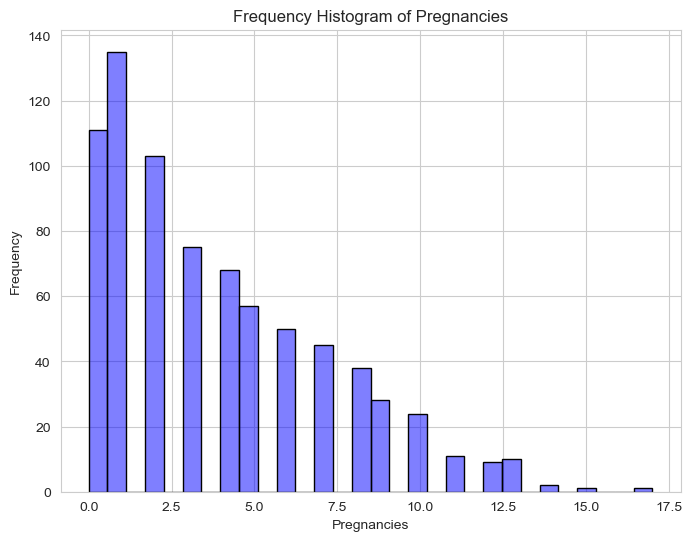

In [10]:
# Histogram for number of pregnancies.

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
pregnancies = patients_data['Pregnancies']
sns.histplot(pregnancies, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Pregnancies')
plt.show()

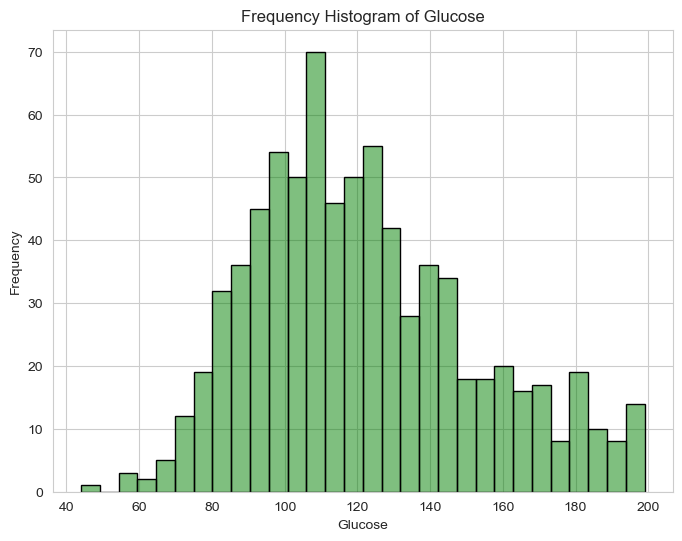

In [11]:
# Histogram for glucose levels.

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
glucose = patients_data['Glucose']
sns.histplot(glucose, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Glucose')
plt.show()


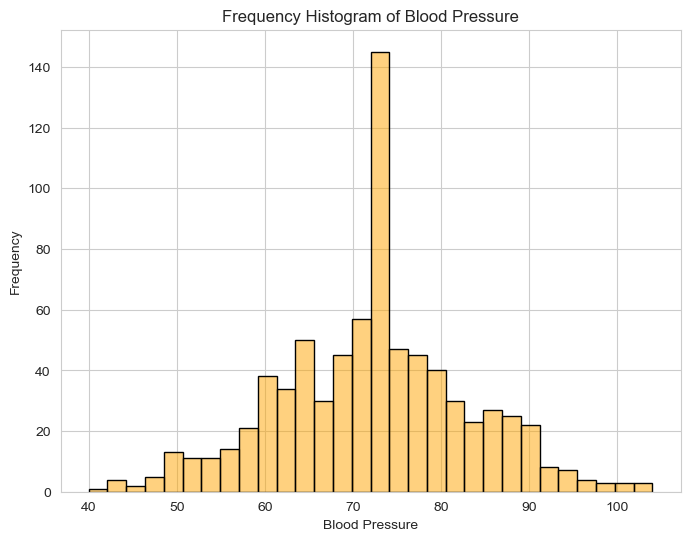

In [12]:
# Histogram for blood pressure levels.

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
bloodpressure = patients_data['BloodPressure']
sns.histplot(bloodpressure, bins=30, alpha=0.5, color='orange', edgecolor='black')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Blood Pressure')
plt.show()

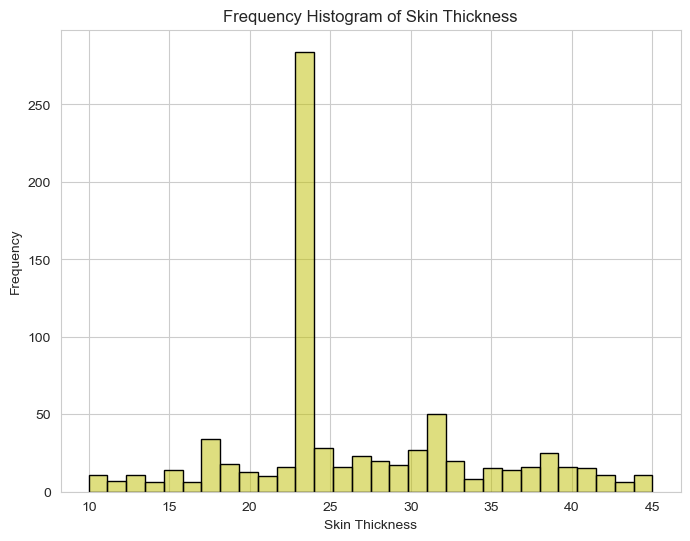

In [13]:
# Histogram for skin thickness

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
skinthickness = patients_data['SkinThickness']
sns.histplot(skinthickness, bins=30, alpha=0.5, color='y', edgecolor='black')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Skin Thickness')
plt.show()

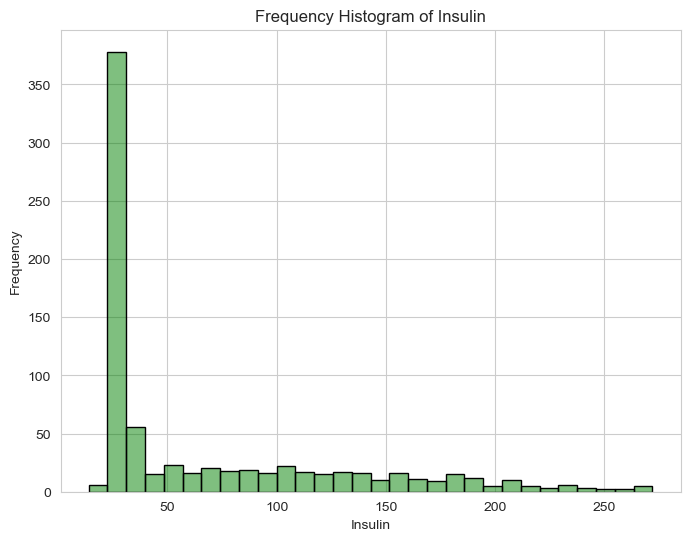

In [14]:
# Histogram for insulin levels


plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
insulin = patients_data['Insulin']
sns.histplot(insulin, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Insulin')
plt.show()

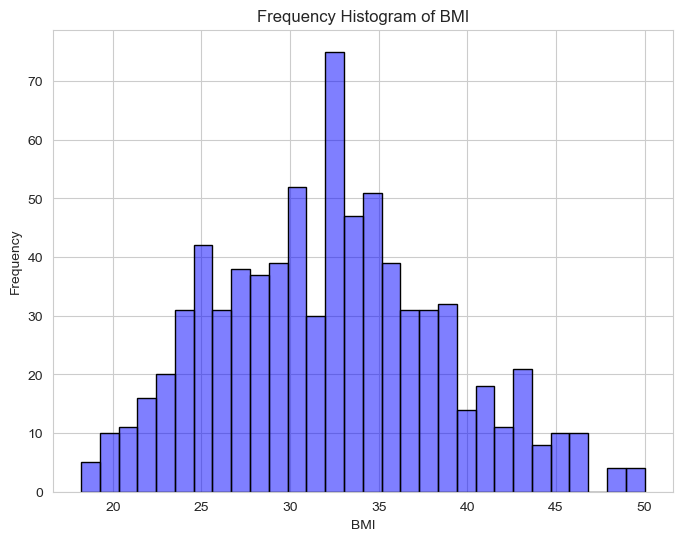

In [15]:
# Histogram for BMI

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
bmi = patients_data['BMI']
sns.histplot(bmi, bins=30, alpha=0.5, color='b', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of BMI')
plt.show()

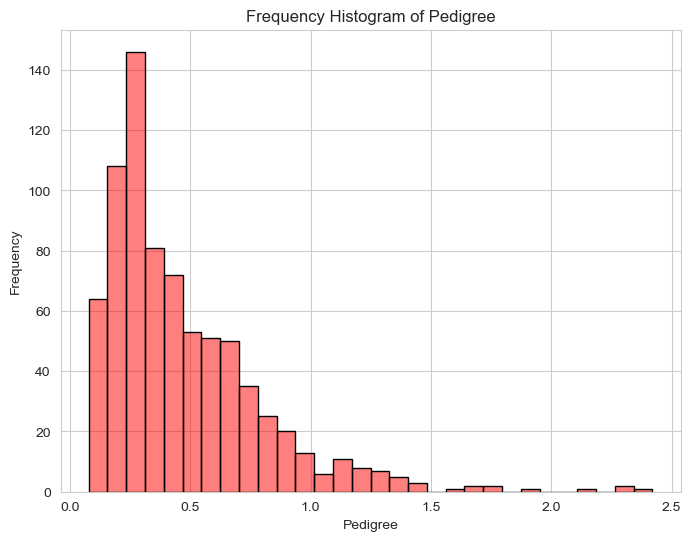

In [16]:
# Histogram for pedigree

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
pedigree = patients_data['Pedigree']
sns.histplot(pedigree, bins=30, alpha=0.5, color='r', edgecolor='black')
plt.xlabel('Pedigree')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Pedigree')
plt.show()

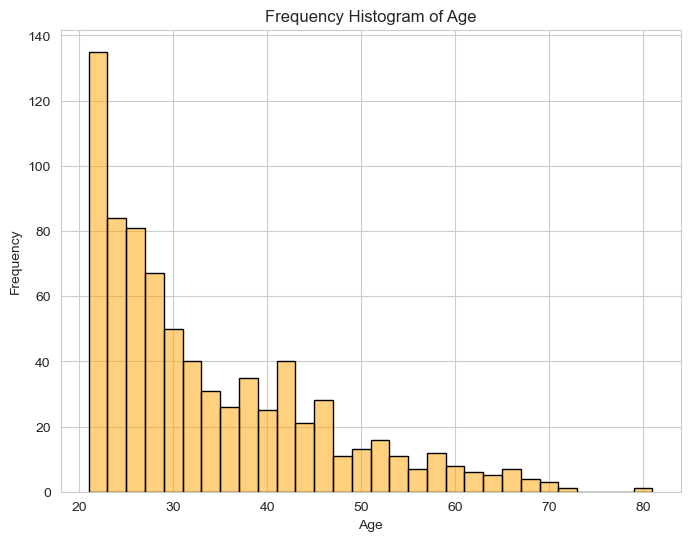

In [17]:
# Histogram for age

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
age = patients_data['Age']
sns.histplot(age, bins=30, alpha=0.5, color='orange', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Age')
plt.show()

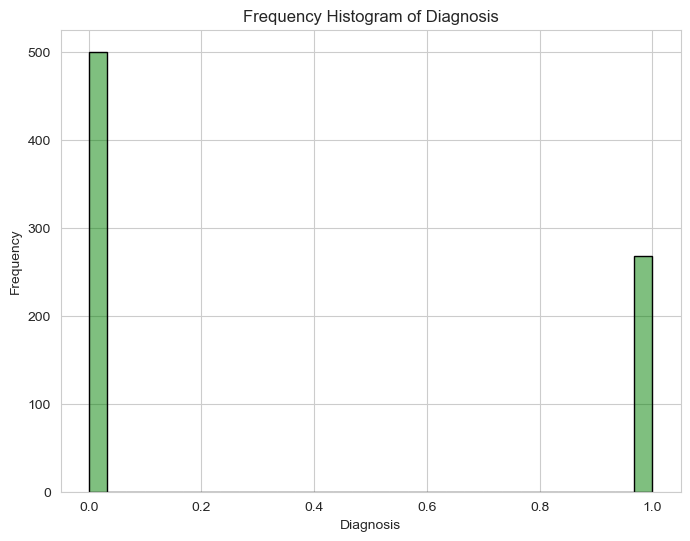

In [18]:
# Histogram for diagnosis

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
diagnosis = patients_data['Diagnosis']
sns.histplot(diagnosis, bins=30, alpha=0.5, color='g', edgecolor='black')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.title('Frequency Histogram of Diagnosis')
plt.show()

<b> I.) Explain the histograms. </b>
    
We created histograms for each variable to see how frequent each variable was and to use our data visualization techniques to make sure our data is clean and ready to be analyzed effeciently. We see that there are more people in our data without diabetes than with diabetes. We can confirm that Insulin, Glucose and Blood Pressure have the most variance compared to the other variables. For most of the variables, the distribution is normal. However, the histograms for Skin Thickness, Insulin, and Pedigree are skewed to the right. We can also see that most of the women in this dataset are in their 20's and 30's and have had between 0 - 3 pregnancies. If we look at the histogram for BMI, it peaks between 30 - 35, which is within the obesity range. If we look at the histogram for diagnosis, we can see that the women in our dataset our much more likely to be classified as class 0, not diabetic. This indicates that our dataset is imbalanced towards class 0.

<b> J.) Create a boxplot for each of the varibles. 

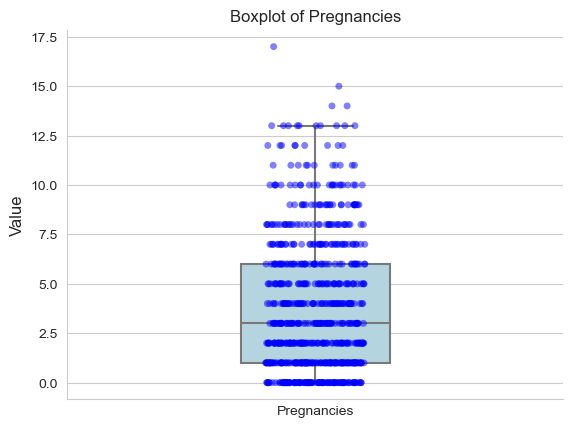

In [19]:
pregnancies = patients_data['Pregnancies']
ax = sns.boxplot(data=pregnancies, color='lightblue', width=0.3, showfliers=False)
sns.stripplot(data=pregnancies, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Pregnancies', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Pregnancies', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()


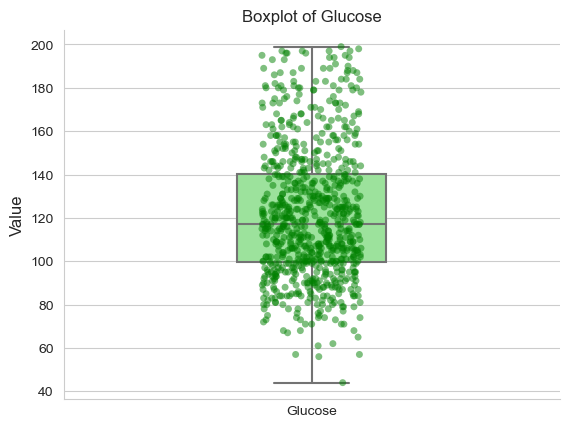

In [20]:
glucose = patients_data['Glucose']
ax = sns.boxplot(data=glucose, color='lightgreen', width=0.3, showfliers=False)
sns.stripplot(data=glucose, color='green', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Glucose', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Glucose', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()


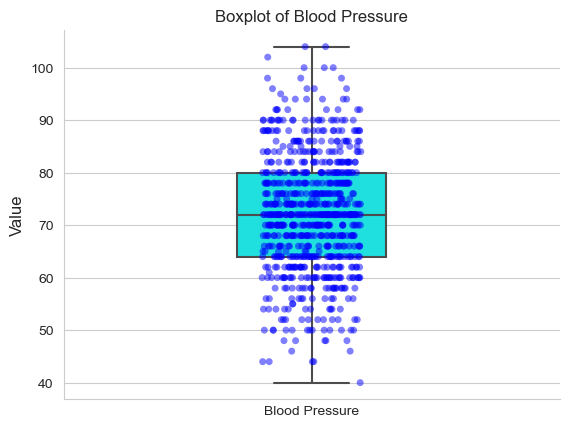

In [21]:
bloodpressure = patients_data['BloodPressure']
ax = sns.boxplot(data=bloodpressure, color='cyan', width=0.3, showfliers=False)
sns.stripplot(data=bloodpressure, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Blood Pressure', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Blood Pressure', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

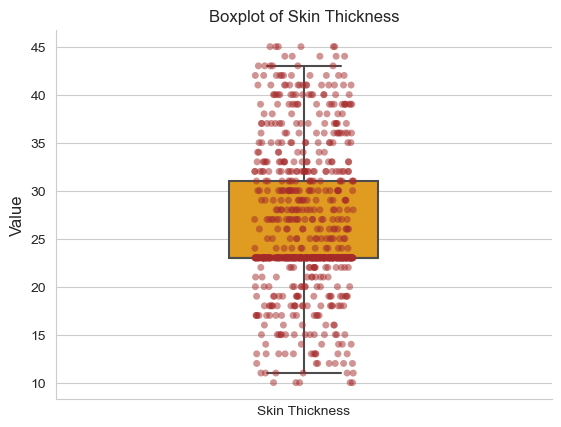

In [22]:
skinthickness = patients_data['SkinThickness']
ax = sns.boxplot(data=skinthickness, color='orange', width=0.3, showfliers=False)
sns.stripplot(data=skinthickness, color='brown', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Skin Thickness', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Skin Thickness', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

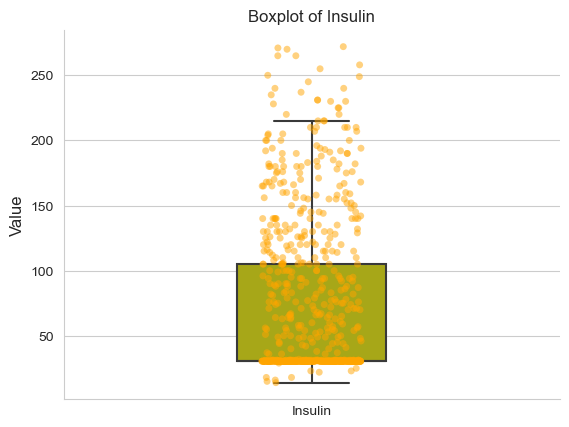

In [23]:
insulin = patients_data['Insulin']
ax = sns.boxplot(data=insulin, color='y', width=0.3, showfliers=False)
sns.stripplot(data=insulin, color='orange', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Insulin', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Insulin', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

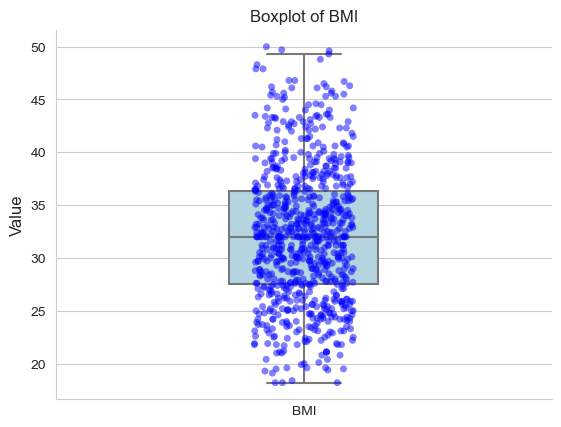

In [24]:
bmi= patients_data['BMI']
ax = sns.boxplot(data=bmi, color='lightblue', width=0.3, showfliers=False)
sns.stripplot(data=bmi, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('BMI', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of BMI', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

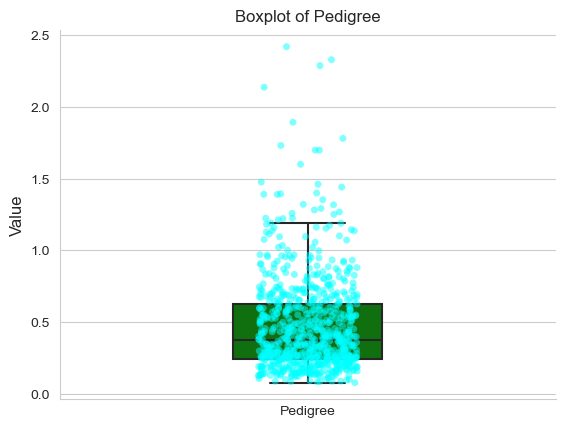

In [25]:
pedigree = patients_data['Pedigree']
ax = sns.boxplot(data=pedigree, color='green', width=0.3, showfliers=False)
sns.stripplot(data=pedigree, color='cyan', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Pedigree', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Pedigree', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

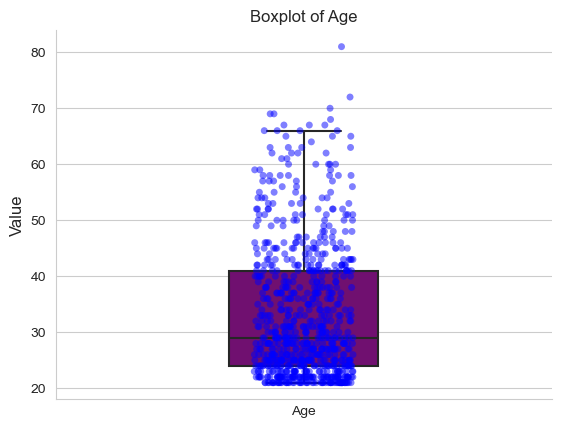

In [26]:
age = patients_data['Age']
ax = sns.boxplot(data=age, color='purple', width=0.3, showfliers=False)
sns.stripplot(data=age, color='blue', size=5, alpha=0.5)
sns.despine()
ax.set_xlabel('Age', fontsize=10)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Boxplot of Age', fontsize=12)
ax.set_xticks([]) # removes the 0 from x axis
ax.set_xticklabels([])
plt.show()

<b> K.) Explain the boxplots

The boxplot is a way to measure the median, which is represented inbetween the 1st quartile and the 3rd quartile. The box plot extends beyone the IQR (50% range) and displays a pair of whiskers on each side, where everything beyond this point is considered an outlier. Blood pressure, glucose, and pregnancies do not contain any outliers. The median is roughly centered in the boxplots for BMI, blood pressure, and glucose. This indicates that the data is roughly symmetric.

<b> L.) Create a heat map to see the correlation between variables using seaborn. Which varibles are most correlated?

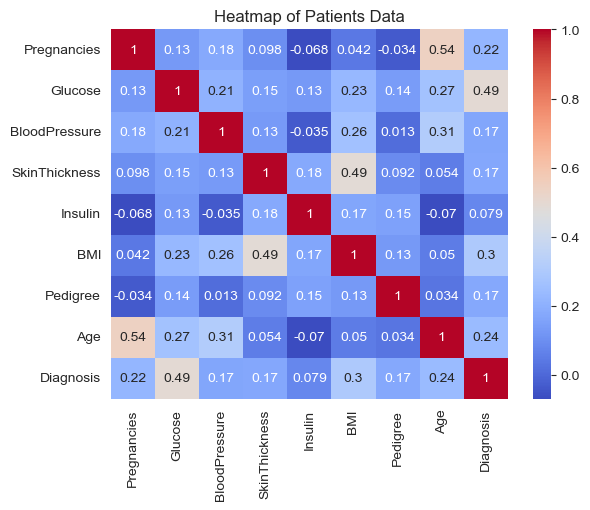

In [27]:

sns.heatmap(patients_data.corr(), cmap='coolwarm', annot=True)

plt.title('Heatmap of Patients Data')

plt.show()


<AxesSubplot:xlabel='Diagnosis', ylabel='Age'>

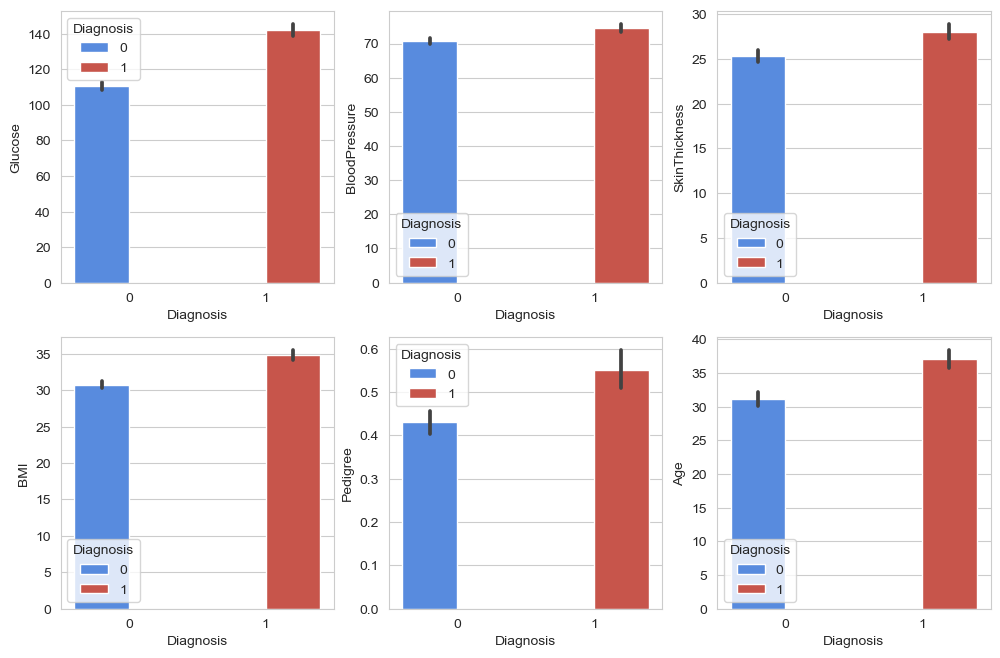

In [28]:
# BONUS VISUALIZATIONS BAR/SUB-PLOT
custom_palette = sns.color_palette(["#4285F4", "#DB4437"])
plt.figure(figsize=(12,12))
plt.subplot(3,3,1)
sns.barplot(x='Diagnosis',y='Glucose',data=patients_data,hue="Diagnosis", palette=custom_palette)
plt.subplot(3,3,2)
sns.barplot(x='Diagnosis',y='BloodPressure',data=patients_data,hue="Diagnosis", palette=custom_palette)
plt.subplot(3,3,3)
sns.barplot(x='Diagnosis',y='SkinThickness',data=patients_data,hue="Diagnosis", palette=custom_palette)
plt.subplot(3,3,4)
sns.barplot(x='Diagnosis',y='BMI',data=patients_data,hue="Diagnosis", palette=custom_palette)
plt.subplot(3,3,5)
sns.barplot(x='Diagnosis',y='Pedigree',data=patients_data,hue="Diagnosis", palette=custom_palette)
plt.subplot(3,3,6)
sns.barplot(x='Diagnosis',y='Age',data=patients_data,hue="Diagnosis", palette=custom_palette)


# We new insight: we have information about women are who diabetic, than not diabetic, but our model is better at predicting
# who are not-diabetic?

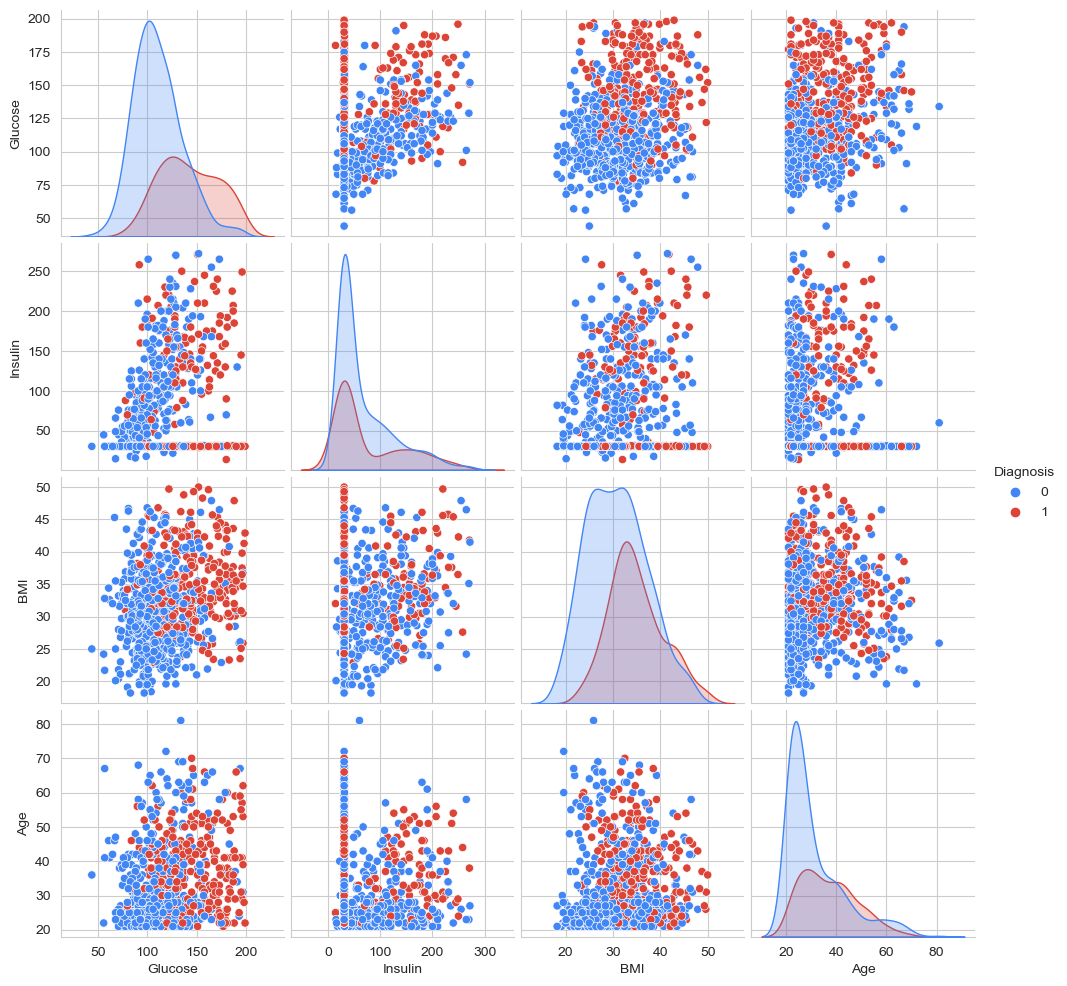

In [29]:
# BONUS PAIR PLOT
sns.pairplot(data=patients_data, vars=["Glucose", "Insulin", "BMI", "Age"], hue='Diagnosis', palette=custom_palette);
# Insights from this visualization: As BMI increases, glucose increases. There is a linear correlation between insulin and glucose,
# but in the heatmap, the correlation is mentioned very low (why?). Women with high glucose levels have high insulin levels. You can
# see a linear correlation between pregnancies and age.

The variables that are most correlated are Pregnancies and Age, Diagnosis and Glucose, Diagnosis and BMI, and BMI and SkinThickness.

<b> M.) Find the best performing features using feature extraction in scikit Learn.

In [30]:
X = patients_data.drop(columns = ['Diagnosis'], axis=1)
Y = patients_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
selector = SelectKBest(score_func=f_classif, k=3) # k=3 is how many of the top features we our model to use to predict/test our results
selector.fit(X_train, y_train)

X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)


model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# Evaluate model on transformed testing set
score = model.score(X_test_transformed, y_test)

print(f'Test accuracy using top 3 features: {score:.2f}')
selected_features = X_train.columns[selector.get_support()]
print("Selected top 3 features:", selected_features)
# Top selected Features include Glucose, BMI, and AGE




Test accuracy using top 3 features: 0.74
Selected top 3 features: Index(['Glucose', 'BMI', 'Age'], dtype='object')


<b> N.) Standardize your features to Gaussian distribution. </b>  and   <b> O.) Split the dataset into 60/40 training and testing.

In [31]:
X = patients_data.drop(columns = ['Diagnosis'], axis=1)
Y = patients_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
selector = SelectKBest(score_func=f_classif, k=3) # k=3 is how many of the top features we our model to use to predict/test our results
selector.fit(X_train, y_train)

X_train_transformed = selector.transform(X_train)
X_test_transformed = selector.transform(X_test)


# Standardizing 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)



# Transform the data to a Gaussian distribution
pt = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_gaussian = pt.fit_transform(X_train_scaled)
X_test_gaussian = pt.transform(X_test_scaled)



<b> P.) Create a logistic regression model (call it LRM1) using your best features. Describe your model.

In [32]:
# Test it

LRM1 = LogisticRegression()
LRM1.fit(X_train_gaussian, y_train)

# Evaluate model on transformed testing set
score = LRM1.score(X_test_gaussian, y_test)

print(f'Test accuracy for LRM1 after STANDARDIZATION: {score:.2f}')
selected_features = X_train.columns[selector.get_support()]
print("Selected features for LRM1:", selected_features)

# This model takes into account our standardized guassian x_train and x_test distribution units
# using the 60/40 training and testing split we applied, 60% training and 40% testing, using the top 2 selected features.



Test accuracy for LRM1 after STANDARDIZATION: 0.77
Selected features for LRM1: Index(['Glucose', 'BMI', 'Age'], dtype='object')


<b> Q.) Create classification report of your model


LRM1 Classification Report
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       206
           1       0.66      0.62      0.64       102

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.74       308
weighted avg       0.77      0.77      0.77       308



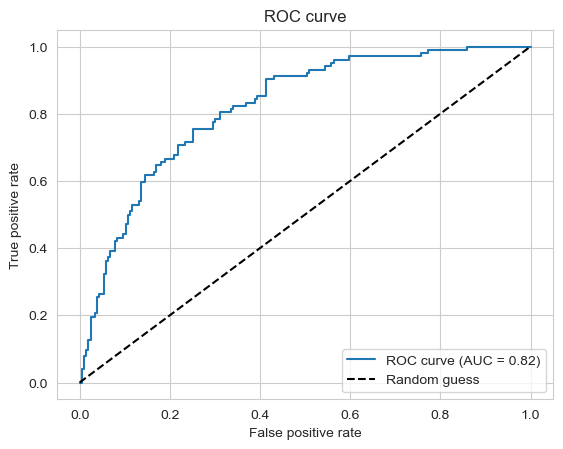

In [33]:
y_pred = LRM1.predict(X_test_gaussian)
print() 
# create a classification report
print('LRM1 Classification Report')
print(classification_report(y_test, y_pred))

# The code below finds the ROC/AUC
# Predict probabilities for test set
y_proba = LRM1.predict_proba(X_test_gaussian)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

<b> R.) Describe your classification report (precision, recall, F1 score, and support).

Our total model accuracy is 78% accurate with its precision score being 82% right when predicting
if someone is NOT diabetic and a precision score of 67% when predicting if someone DOES HAVE diabetes. Our total f1-score, which is the weighted average of the precision and recall, is 84% correct when predicting if someone is not-diabetic, and 65% correct on average when predicting if someone IS DIABETIC. We are dealing with 308 total support, which 206 support are for non-diabetic, and 102 support are for diabetic positive. Our precision, F1 score and recall scores were alot better predicting if someone was NOT-diabetic

<b> S.) Create the accuracy score of your model. Describe the accuracy score.

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score for LRM1:', accuracy)

Accuracy score for LRM1: 0.7694805194805194


The accuracy score measures how many instances we were able to predict correctly using the model ranging between 0 and 1, a higher score means your model predicted more successfuly. We ended up predicting 77% correct.

<b> T.) Create another logistic regression model (call it LRM2). Use all of the independent variables or features this time (instead of your best performing features).

Test accuracy for LRM2: 0.78
ALL features included for LRM2: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age'],
      dtype='object')

LRM2 Classification Report
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.74      0.75       308
weighted avg       0.77      0.78      0.78       308



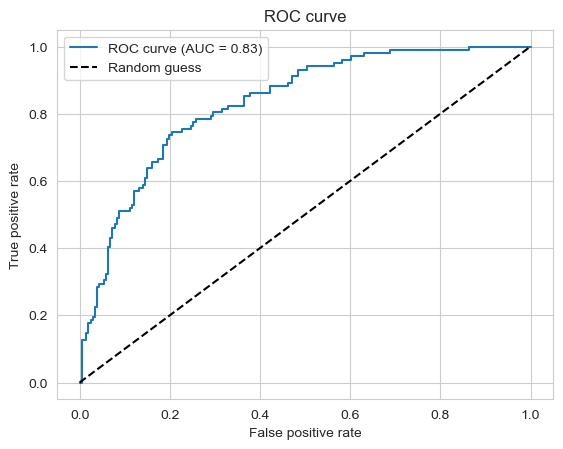

In [35]:
X = patients_data.drop(columns = ['Diagnosis'], axis=1)
Y = patients_data['Diagnosis']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.4, random_state=42)
selector = SelectKBest(score_func=f_classif, k=8) # k=8 uses all of the independent variables in our modelto predict/test our results
selector.fit(X_train2, y_train2)

X_train_transformed2 = selector.transform(X_train2)
X_test_transformed2 = selector.transform(X_test2)


# Standardizing 
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_transformed2)
X_test_scaled2 = scaler.transform(X_test_transformed2)



# Transform the data to a Gaussian distribution
pt = PowerTransformer(method='yeo-johnson', standardize=False)
X_train_gaussian2 = pt.fit_transform(X_train_scaled2)
X_test_gaussian2 = pt.transform(X_test_scaled2)


# Test it
LRM2 = LogisticRegression()
LRM2.fit(X_train_gaussian2, y_train2)

# Evaluate model on transformed testing set
score = LRM2.score(X_test_gaussian2, y_test2)

print(f'Test accuracy for LRM2: {score:.2f}')
selected_features = X_train2.columns[selector.get_support()]
print("ALL features included for LRM2:", selected_features)


# create a classification report
y_pred2 = LRM2.predict(X_test_gaussian2)
print()
print('LRM2 Classification Report')
print(classification_report(y_test2, y_pred2))

# This model takes into account our standardarized guassian x_train and x_test distribution units
# using the 60/40 training and testing split we applied, 60% training and 40% testing, but this time, we
# used all of the features instead of the top 2. We ended up with the same accuracy score as LRM1.



# The code below finds the ROC/AUC
# Predict probabilities for test set
y_proba = LRM2.predict_proba(X_test_gaussian2)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test2, y_proba)

# Calculate AUC score
auc = roc_auc_score(y_test2, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

Accuracy: 0.7142857142857143
Decision-Tree Classification Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        99
           1       0.60      0.60      0.60        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



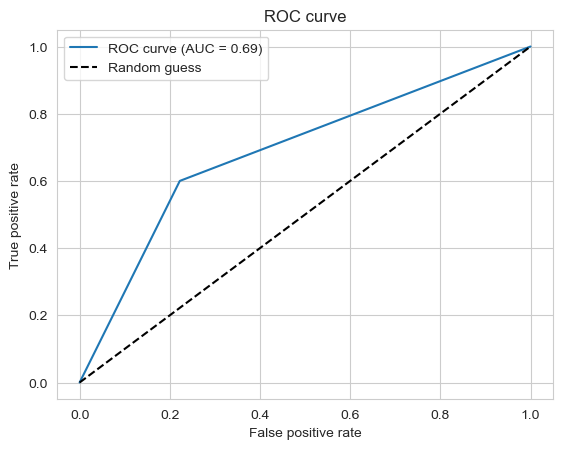

In [36]:
# This is a bonus model - Decision-Tree Classifier Model
X = patients_data.drop(columns = ['Diagnosis'], axis=1)
Y = patients_data['Diagnosis']
# testing 20% of the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Decision-Tree Classification Report')
print(classification_report(y_test, y_pred))


# The code below finds the ROC/AUC
# Predict probabilities for test set
y_proba = tree.predict_proba(X_test)[:, 1]

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calculate AUC score
auc = roc_auc_score(y_test, y_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

<b> U.) Compare the two models (LRM1 and LRM2) based on the classification report and accuracy score. Which one is a better model? Why?

Based on our results, LRM1 and LRM2 both recieved overall accuracy scores of 78%, which means both models scored a similar accuracy when predicting what instances were actually correct. In both models, the F1-score for class 0, which is the average of precision and recall, is  higher than the F1-score for class 1. This means that our models are better at identifying patients who are not diabetic compared to patients who are diabetic. This is likely due to the fact that our dataset is imbalanced towards class 0. We have a much higher sample of women who are class 0, which could explain why our model performs better for class 0 than it does for class 1. However, LRM2 does have a slightly higher F1-score for class 0 and it also has a higher AUC, making it a better model in this case.

<b> V.) What would be your suggestions for further improving the accuracy of your chosen model?

To further improve our model's accuracy, we can collect more data that has a high correlation to someone becoming diabetic. Our sample is also biased and imbalanced towards class 0 (not diabetic), so collecting more data using random sampling methods could help us acheive a higher accuracy. Since our goal is to identify women who have a greater likelihood of developing gestational diabetes, improving the performance of class 1 would be beneficial.
We can also re-visualize and re-select our best features that we want to take in account and continue to experiment with different features, and we can re-clean our data being more distinct in what values get dropped or replaced, also making sure the right outliers are replaced/deleted. Running the data through more visualizations will help us as well.

<b> W.) What would be the pitfalls or weaknesses of your model if the hospital decided to deploy it to predict diabetes?

Some pitfalls and weaknesses of using our models include having to deal with patients' confidential personal health information,
since HIPAA has restrictions on how we can use patient data, but also the overall model being not 100% accurate; this can
lead to misdiagnosing patients with diabetes, creating law suits and major corporate consequences
We also don't know the accuracy of our model on certain subgroups of patients. Some patients may be more likely to be misdiagnosed than others, which raises ethical concerns. In addition, our model will need to be routinely monitored to ensure that its accuracy is at an acceptable level. This will cost the hospital time and money. Our model is imbalanced towards class 0. It may have high specificity but low sensitivity towards non-diabetic women. So our model may be better at predicting non-diabetic individuals, but it may miss many diabetic individuals.
In addition, our model does not account for all confounding variables, such as health, diet, exercise, and genetics. Our model is also not reflective of the entire population. On average, our data contained women who were 33 years old and likely prediabetic with slight obesity.

<b> X.) If you were to present your analysis and findings to the CEO of the hospital, what would be your top five key points?

<b> 1.) </b> Our model shows promising results with an overall accuracy score of 78%, but there is room for improvement. Since our model is not 100% accurate, there is always the risk of false positives and false negatives, and we need to consider the potential consequences of that. False positives could lead to patients recieving unecessary treatments, and false negatives could result in patients receiving a delayed diagnosis, allowing time for the disease to progress. 
 
<b> 2.) </b> We recommend collecting more data with additional features to improve the accuracy of our model. The sample size may not be large enough to detect a significant correlation between variables. With a small sample size, the correlation coefficient may be subject to greater variability and less reliable. Currently, we don’t have enough data.

<b> 3.) </b> Given that logistic regression models base their predictions on probabilities, which means that there is always some degree of uncertainty in the forecasts, we advise using our model as a tool to assist clinical decision making rather than as a replacement. Keep in mind, our model is biased towards women who are mostly likely on average pre-diabetic, obese and 33 years old. (Should not be applied externally in other environments/populations.)

<b> 4.) </b> The external validity of our findings may be limited due to the small sample size, not having a good enough random sample, and bias; so it may be difficult to apply our results to other populations.


<b> 5.) </b> The F1-score is higher for class 0 in our model, indicating that it is better at identifying non-diabetic patients. This is likely due to our imbalanced dataset, so collecting more data could help with this as well.